**Imports**

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

**Dataset Preparation**

In [2]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=5, random_state=10)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

**Model**

In [3]:
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

**Loss and Optimizer**

In [4]:
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate)

**Training loop**

In [5]:
num_epochs = 1000
for epoch in range(num_epochs):
  # forward pass and loss
  y_pred = model(X)
  loss = criterion(y_pred, y)

  # backward
  loss.backward()

  # update of weights
  optimizer.step()

  optimizer.zero_grad()  # making the gradients 0 

  if (epoch+1)%50==0:
    print(f'epoch = {epoch+1}, loss = {loss.item()}')

epoch = 50, loss = 161.10693359375
epoch = 100, loss = 42.716861724853516
epoch = 150, loss = 24.81570816040039
epoch = 200, loss = 22.046613693237305
epoch = 250, loss = 21.610092163085938
epoch = 300, loss = 21.540239334106445
epoch = 350, loss = 21.5289249420166
epoch = 400, loss = 21.527076721191406
epoch = 450, loss = 21.526775360107422
epoch = 500, loss = 21.526723861694336
epoch = 550, loss = 21.526718139648438
epoch = 600, loss = 21.526718139648438
epoch = 650, loss = 21.526716232299805
epoch = 700, loss = 21.526716232299805
epoch = 750, loss = 21.526714324951172
epoch = 800, loss = 21.526716232299805
epoch = 850, loss = 21.526718139648438
epoch = 900, loss = 21.526714324951172
epoch = 950, loss = 21.526714324951172
epoch = 1000, loss = 21.526714324951172


**plotting**

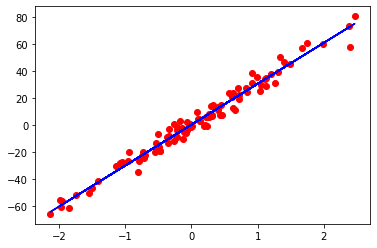

In [6]:
predicted = model(X).detach().numpy()  # detach() makes the argument of compute gradient False
plt.plot(X_numpy, y_numpy, "ro")
plt.plot(X_numpy, predicted, "b") 